In [3]:
import os
from mayavi import mlab
import numpy as np
import scipy.io
import img_pipe
%matplotlib inline

In [4]:
subject, hem = 'A228x', 'lh'

In [5]:
print 'Subjects directory:', os.environ['SUBJECTS_DIR']
print 'Freesurfer directory:', os.environ['FREESURFER_HOME']

Subjects directory: /Users/bendichter/dura_mount/data_store2/imaging/subjects
Freesurfer directory: /Applications/freesurfer


In [7]:
#elecmatrix = np.array([[-55, 2.76, 40.14], [-55.77, -5.614, 44.55]]) ##EC74
#elecmatrix  = np.array([[-60.14, 8.878, 40.99]]) ##A103
#elecmatrix  = np.array([[-50.17, -8.136, 49.51]]) ##A208
elecmatrix = scipy.io.loadmat('/Users/bendichter/Box Sync/data/' + subject + '/' + subject + '_stim_matrix.mat')['elecmatrix']

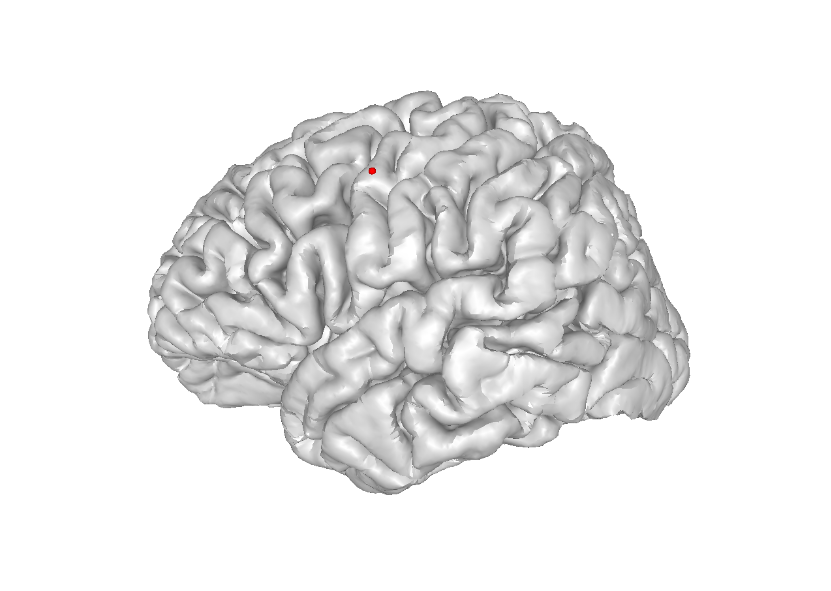

(<mayavi.modules.surface.Surface at 0x132eedcb0>,
 <module 'mayavi.mlab' from '/Users/bendichter/anaconda/envs/python2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [8]:
patient = img_pipe.freeCoG(subj=subject, hem=hem)
patient.plot_brain(elecs=elecmatrix, showfig=False, screenshot=True)

In [9]:
warped_elecs = patient.compute_surface_warp(elecmatrix)

Finding nearest surface vertex for each electrode
Warping each electrode separately:
Warping ch 0


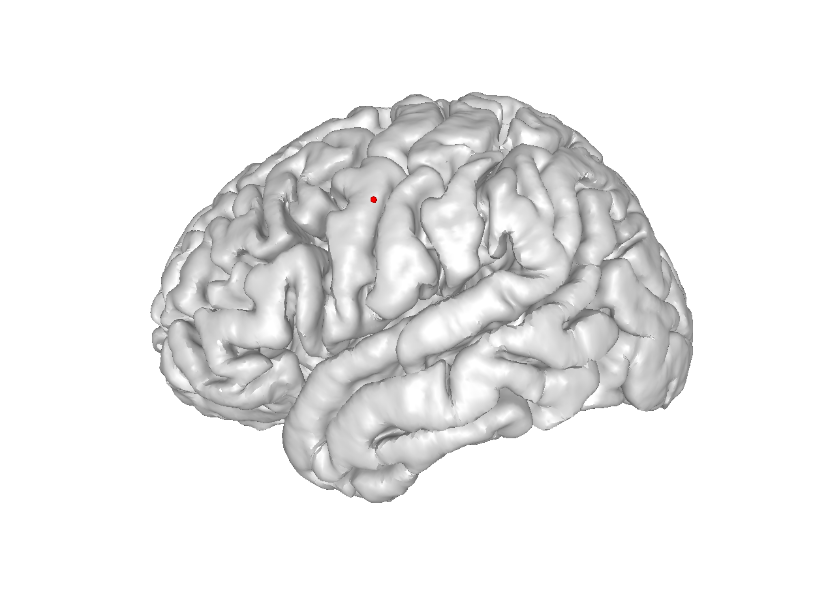

(<mayavi.modules.surface.Surface at 0x1395c1b30>,
 <module 'mayavi.mlab' from '/Users/bendichter/anaconda/envs/python2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [10]:
mni = img_pipe.freeCoG(subj='cvs_avg35_inMNI152', hem='lh')
mni.plot_brain(elecs=warped_elecs, showfig=False, screenshot=True)

In [11]:
scipy.io.savemat('/Users/bendichter/Box Sync/data/'+subject+'/Imaging/'+subject+'_to_cvs_avg35_inMNI152_stim_matrix.mat',
                {'elecmatrix':warped_elecs})

In [12]:
subjects = ['A28','A103','EC36','A167','A179','EC74','A208', 'A228x']
all_sites = []
for subject in subjects:
    warped_path = '/Users/bendichter/Box Sync/data/'+subject+'/Imaging/'+subject+'_to_cvs_avg35_inMNI152_stim_matrix.mat'
    elecmatrix = scipy.io.loadmat(warped_path)['elecmatrix']
    all_sites.append(elecmatrix)
all_sites = np.vstack(all_sites)

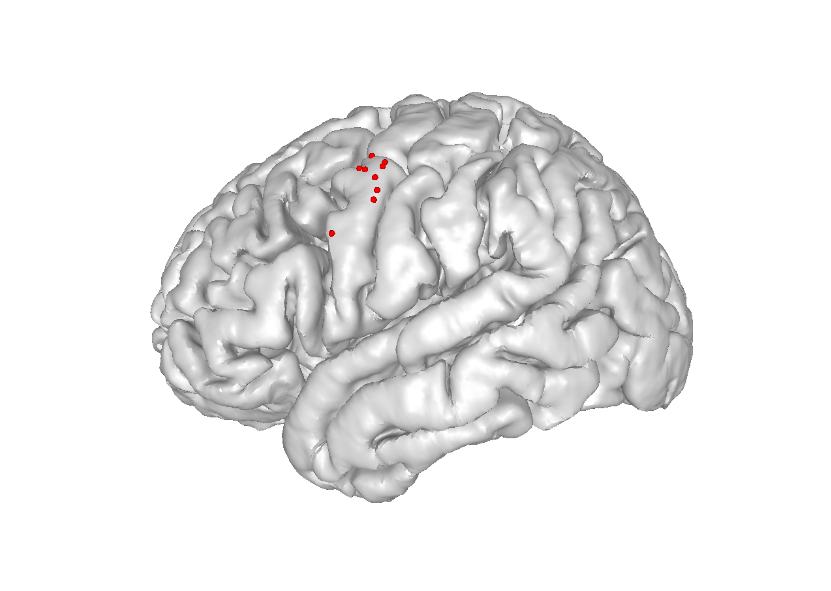

(<mayavi.modules.surface.Surface at 0x132cf8ef0>,
 <module 'mayavi.mlab' from '/Users/bendichter/anaconda/envs/python2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [13]:
mni.plot_brain(elecs=all_sites, showfig=False, screenshot=True)

In [ ]:
patient.r

In [46]:
rois = []
for roi in patient.get_rois():
    try:
        rois.append(patient.roi(roi))
    except:
        pass

In [47]:
patient.plot_brain(rois=rois)

IOError: [Errno 2] No such file or directory: '/Users/bendichter/dura_mount/data_store2/imaging/subjects/A228x/Meshes/rAcumb_trivert.mat'

In [48]:
patient.roi(roi)

<img_pipe.img_pipe.roi instance at 0x145746f38>

In [63]:
from glob import glob

In [65]:
glob('/Users/bendichter/dura_mount/data_store2/imaging/subjects/A228x/Meshes/*_trivert.mat')

['/Users/bendichter/dura_mount/data_store2/imaging/subjects/A228x/Meshes/lh_pial_trivert.mat',
 '/Users/bendichter/dura_mount/data_store2/imaging/subjects/A228x/Meshes/rh_pial_trivert.mat']